In [14]:
import pandas as pd
import numpy as np
from google.colab import files
up = files.upload()

Saving dataset.csv to dataset (2).csv


In [18]:
df = pd.read_csv("dataset (2).csv")

In [23]:
df.shape

(200, 5)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = df.select_dtypes(include = "object").columns

for col in objList:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


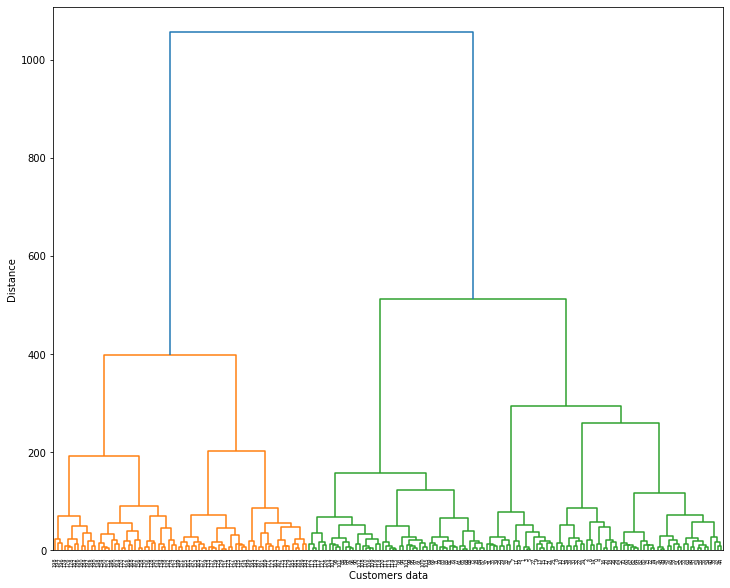

In [24]:
import scipy.cluster.hierarchy as clus
plt.figure(figsize=(12,10))
dendrogram = clus.dendrogram(clus.linkage(df, method="ward"))
plt.xlabel("Customers data")
plt.ylabel("Distance")
plt.show()

##Select the longest vertical line which don't have any vertical line passing through it. In this we get Clusters = 5

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
y_means = model.fit_predict(df)

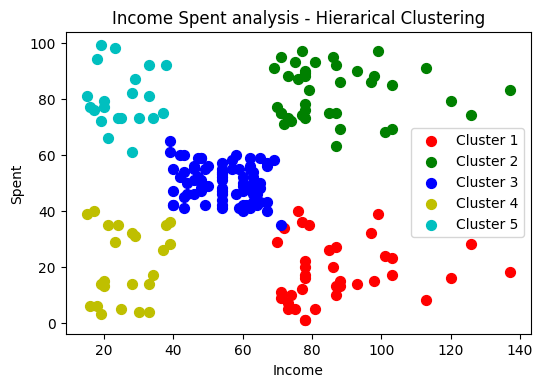

In [27]:
X = df.iloc[:, [3,4]].values
plt.figure(dpi=100)
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], color="r", s=50, label="Cluster 1")
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], color="g", s=50, label="Cluster 2")
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], color="b", s=50, label="Cluster 3")
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], color="y", s=50, label="Cluster 4")
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], color="c", s=50, label="Cluster 5")
plt.legend(loc="best")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.title("Income Spent analysis - Hierarical Clustering")
plt.show()